In [1]:
import numpy as np
import s2fft as s2f
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [2]:
import scipy.io
data_dict = scipy.io.loadmat('./EGM2008_Topography_flms_L0128.mat')
L = np.ravel(data_dict["L"])[0]
flm = data_dict["flm"]

In [3]:
L = 16

In [4]:
sampling = "mw"
f = s2f.transform.inverse_sov_fft(flm, L, spin=0, sampling=sampling)
f = np.fliplr(f)

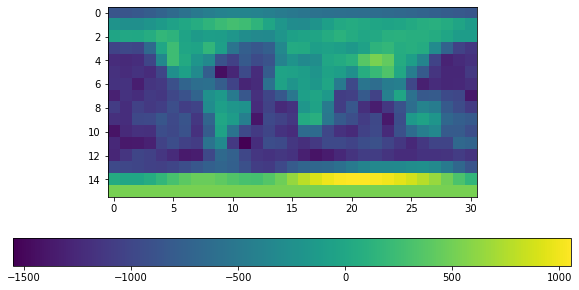

In [5]:
plt.imshow(np.real(f))
plt.colorbar(orientation="horizontal")

In [6]:
f_ext = s2f.resampling.periodic_extension_mw(f, L)

In [7]:
f_ext.shape

(31, 31)

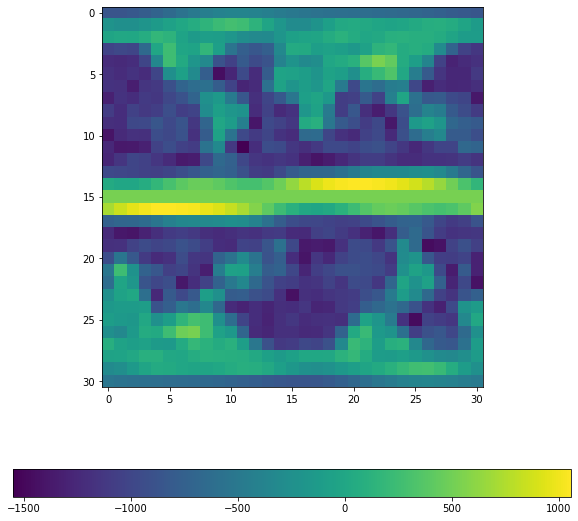

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(np.real(f_ext))
plt.colorbar(orientation="horizontal")

Need to reflect in theta about pi and apply a pi shift in phi.

In [9]:
sampling = "mwss"
f = s2f.transform.inverse_sov_fft(flm, L, spin=0, sampling=sampling)
f = np.fliplr(f)

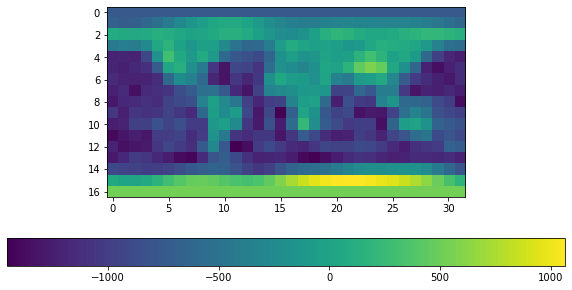

In [10]:
plt.imshow(np.real(f))
plt.colorbar(orientation="horizontal")

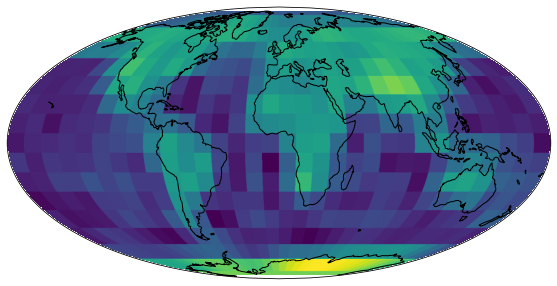

In [11]:
import cartopy.crs as ccrs
plt.figure(figsize=(10,5))
ax = plt.axes(projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
ax.imshow(np.real(f),transform=ccrs.PlateCarree())
plt.show()

In [12]:
f_ext = s2f.resampling.periodic_extension_mwss(f, L)
f_ext.shape

(32, 32)

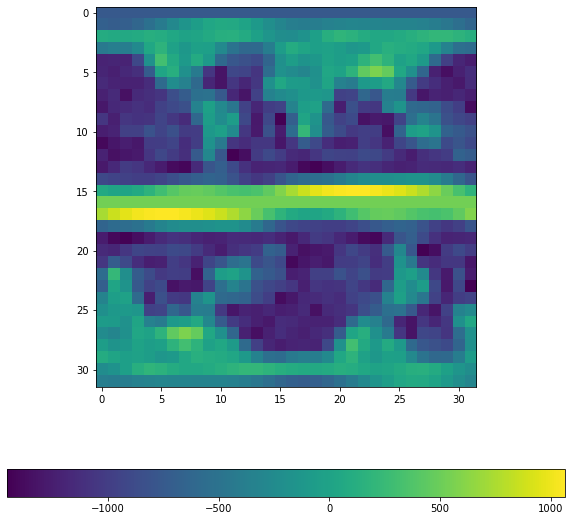

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(np.real(f_ext))
plt.colorbar(orientation="horizontal")

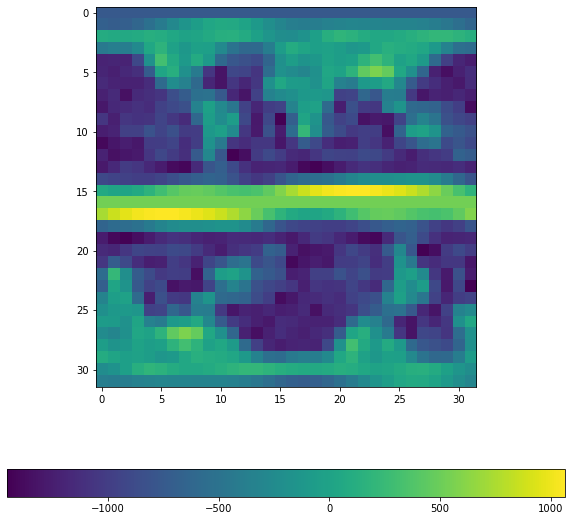

In [16]:
f_ext_pix = np.zeros_like(f_ext)
ntheta = s2f.sampling.ntheta(L, sampling="mwss")
nphi = s2f.sampling.nphi_equiang(L, sampling="mwss")
ntheta_ext = 2 * L

f_ext_pix[0:ntheta, 0:nphi] = f[0:ntheta, 0:nphi]
f_ext_pix[ntheta:, 0:2*L] = np.fft.fftshift(np.flipud(f[1:ntheta-1, 0:2*L]), axes=1)

# f_flip = np.flipud(f[1:ntheta-1, 0:2*L])

# for t in range(L, 2 * L - 1):
#     for p in range(0, 2*L):
#         f_ext_pix[t,p] = f_flip[t-L, (p+L) % (2*L)]


# f_ext_pix.take(L:3*L, axis=1, mode="wrap")
plt.figure(figsize=(10,10))
plt.imshow(np.real(f_ext_pix))
plt.colorbar(orientation="horizontal")

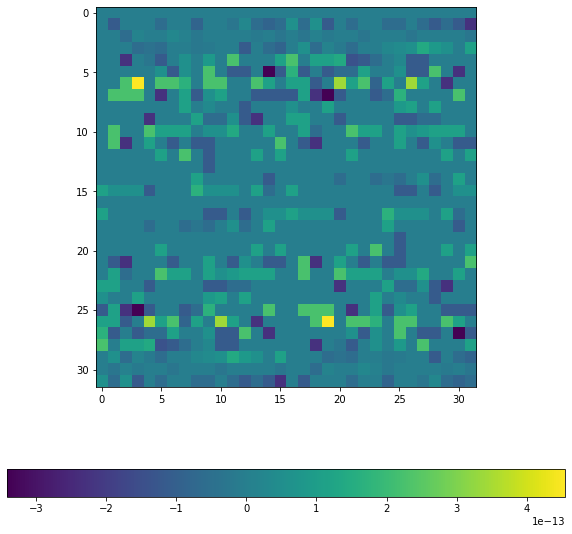

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(np.real(f_ext - f_ext_pix))
plt.colorbar(orientation="horizontal")